#                       CREDIT  CARD  FRAUD  DETECTION 

## 1.Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2.Function for plotting Confusion Matrix"

In [2]:
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 3.Importing the Dataset

In [3]:
df=pd.read_csv('creditcardcsvpresent.csv')

## 4.Data Processing

In [4]:
df.isnull().sum()

Average Amount/transaction/day    0
Transaction_amount                0
Is decli0ed                       0
Total Number of declines/day      0
isForeig0Tra0sactio0              0
isHighRiskCou0tr1                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradule0t                       0
dtype: int64

0    2627
1     448
Name: isFradule0t, dtype: int64
Fraud Class: 0.1456910569105691%


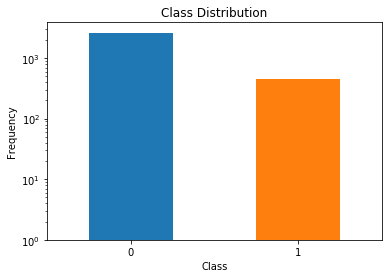

In [5]:
classDist = df['isFradule0t'].value_counts()
print(classDist)
plt.title("Class Distribution")
classDist.plot(kind = 'bar',log=True, rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")
print("Fraud Class: " + str(classDist[1]/(classDist[0]+classDist[1])) + str('%'))

## 5.Creating Feature Matrix and Target Matrix

In [6]:
fm=df.iloc[:,:-1]

In [7]:
fm.head()

,Average Amount/transaction/day,Transaction_amount,Is decli0ed,Total Number of declines/day,isForeig0Tra0sactio0,isHighRiskCou0tr1,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,100.0,3000.0,0,5,1,1,0,0.0,0
1,100.0,4300.0,0,5,1,1,0,0.0,0
2,185.5,4823.0,1,5,0,0,0,0.0,0
3,185.5,5008.5,1,8,0,0,0,0.0,0
4,500.0,26000.0,0,0,1,1,800,677.2,6


In [8]:
tv=df['isFradule0t']

In [9]:
tv.head()

0    1
1    1
2    1
3    1
4    1
Name: isFradule0t, dtype: int64

In [10]:
print(fm.shape)
print(type(fm))
print(tv.shape)
print(type(tv))

(3075, 9)
<class 'pandas.core.frame.DataFrame'>
(3075,)
<class 'pandas.core.series.Series'>


## 6.Split the Dataset into Training Set and Testing Set

In [11]:
from sklearn.model_selection import train_test_split
fm_train,fm_test,tv_train,tv_test=train_test_split(fm,tv,test_size=0.2)

In [12]:
print(fm_train.shape)
print(tv_train.shape)
print(fm_test.shape)
print(tv_test.shape)

(2460, 9)
(2460,)
(615, 9)
(615,)


## 7.Fitting the Model

### 7a.Using Desicion Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier 
dtc=DecisionTreeClassifier()
dtc.fit(fm_train,tv_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
tv_pred_train_dtc=dtc.predict(fm_train)
print(tv_pred_train_dtc[:5])
print(tv_train[:5])

[0 0 0 0 0]
1684    0
1827    0
2484    0
1041    0
1224    0
Name: isFradule0t, dtype: int64


In [15]:
tv_pred_test_dtc=dtc.predict(fm_test)
print(tv_pred_test_dtc[:5])
print(tv_test[:5])

[0 0 0 0 0]
2188    0
1012    0
2303    0
1189    0
1257    0
Name: isFradule0t, dtype: int64


#### Comparing Actual vs Predicted Value

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
as_train_dtc=accuracy_score(tv_train,tv_pred_train_dtc)
print("Train Result: ",as_train_dtc)
as_test_dtc=accuracy_score(tv_test,tv_pred_test_dtc)
print("Test Result:",as_test_dtc)

Train Result:  1.0
Test Result: 0.983739837398374


#### Check Training and Testing Error

In [17]:
cm_train_dtc=confusion_matrix(tv_train,tv_pred_train_dtc)
print("Train Result:")
print(cm_train_dtc)
cm_test_dtc=confusion_matrix(tv_test,tv_pred_test_dtc)
print("Test Result:")
print(cm_test_dtc)

Train Result:
[[2087    0]
 [   0  373]]
Test Result:
[[535   5]
 [  5  70]]


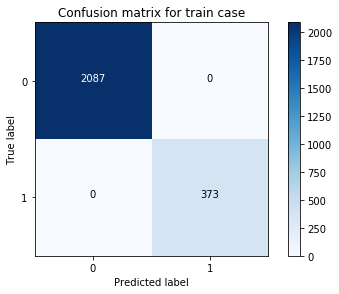

In [18]:
plt.figure()
plot_confusion_matrix(cm_train_dtc,classes="01",title='Confusion matrix for train case')
plt.show()

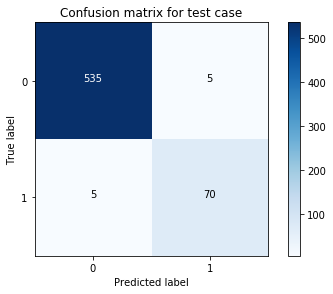

In [19]:
plt.figure()
plot_confusion_matrix(cm_test_dtc,classes="01",title='Confusion matrix for test case')
plt.show()

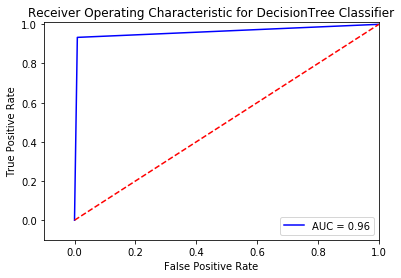

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
fpr, tpr, thresholds = roc_curve(tv_test.values.ravel(),tv_pred_test_dtc)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic for DecisionTree Classifier')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 7b.Using K-Nearest Neighbour Classifiers 

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
knc=KNeighborsClassifier( n_neighbors=1)
knc.fit(fm_train,tv_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
tv_pred_train_knc=knc.predict(fm_train)
print(tv_pred_train_knc[:5])
print(tv_train[:5])

[0 0 0 0 0]
1684    0
1827    0
2484    0
1041    0
1224    0
Name: isFradule0t, dtype: int64


#### Predict targets for the test data

In [23]:
tv_pred_test_knc=knc.predict(fm_test)
print(tv_pred_test_knc[:5])
print(tv_test[:5])

[0 0 0 0 0]
2188    0
1012    0
2303    0
1189    0
1257    0
Name: isFradule0t, dtype: int64


#### Compare Actual vs Predicted Target for the Test Data

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
as_train_knc=accuracy_score(tv_train,tv_pred_train_knc)
print("Train Result: ",as_train_knc)
as_test_knc=accuracy_score(tv_test,tv_pred_test_knc)
print("Test Result:",as_test_knc)

Train Result:  1.0
Test Result: 0.9365853658536586


In [25]:
print("Final rmse value is =",np.sqrt(np.mean((tv_test-tv_pred_test_knc)**2)))

Final rmse value is = 0.2518226243734694


#### Check Training and Testing Errors

In [26]:
cm_train_knc=confusion_matrix(tv_train,tv_pred_train_knc)
print("Train Result:")
print(cm_train_knc)
cm_test_knc=confusion_matrix(tv_test,tv_pred_test_knc)
print("Test Result:")
print(cm_test_knc)

Train Result:
[[2087    0]
 [   0  373]]
Test Result:
[[526  14]
 [ 25  50]]


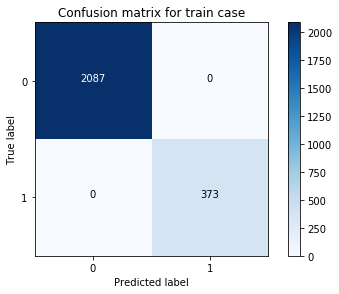

In [27]:
plt.figure()
plot_confusion_matrix(cm_train_knc,classes="01",title='Confusion matrix for train case')
plt.show()

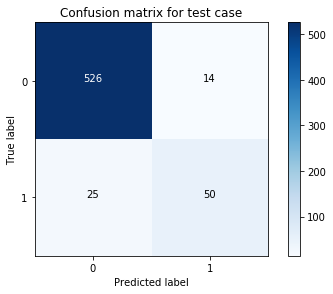

In [28]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_test_knc,classes="01",title='Confusion matrix for test case')
plt.show()

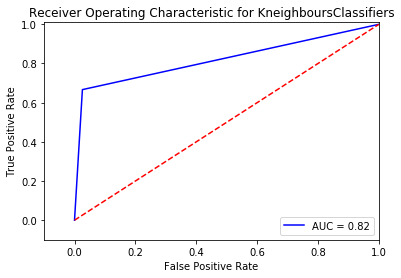

In [29]:

fpr, tpr, thresholds = roc_curve(tv_test.values.ravel(),tv_pred_test_knc)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic for KneighboursClassifiers')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

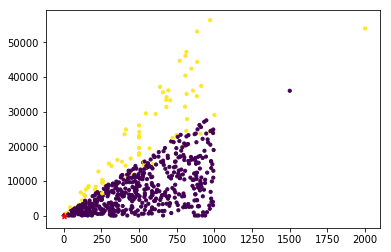

In [30]:
basex = np.array(fm_test)
basey = np.array(tv_test)
x = pd.DataFrame(basex)
y = basey

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, s=10)
plt.scatter(0.25, 0.2, c='r', marker='*')

### 7c.Using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(fm_train,tv_train)

C:\Users\Mudalaje\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
tv_pred_train=lr.predict(fm_train)
print(tv_pred_train[:5])
print(tv_train[:5])

[0 0 0 0 0]
1684    0
1827    0
2484    0
1041    0
1224    0
Name: isFradule0t, dtype: int64


#### Predicting Targets for the Test Data

In [33]:
tv_pred_test=lr.predict(fm_test)
print(tv_pred_test[:5])
print(tv_test[:5])

[0 0 0 0 0]
2188    0
1012    0
2303    0
1189    0
1257    0
Name: isFradule0t, dtype: int64


#### Compare Actual vs Predicted Target for the Test Data

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
as_train=accuracy_score(tv_train,tv_pred_train)
as_train

0.9865853658536585

In [35]:
as_test=accuracy_score(tv_test,tv_pred_test)
as_test

0.9821138211382113

#### Check Training and Testing Errors

In [36]:
cm_train=confusion_matrix(tv_train,tv_pred_train)
cm_train

array([[2077,   10],
       [  23,  350]], dtype=int64)

In [37]:
cm_test=confusion_matrix(tv_test,tv_pred_test)
cm_test

array([[537,   3],
       [  8,  67]], dtype=int64)

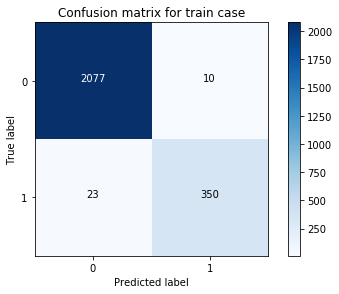

In [38]:
plt.figure()
plot_confusion_matrix(cm_train,classes="01",title='Confusion matrix for train case')
plt.show()

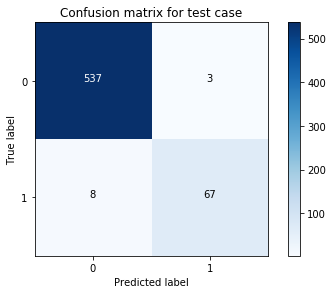

In [39]:
plt.figure()
plot_confusion_matrix(cm_test,classes="01",title='Confusion matrix for test case')
plt.show()

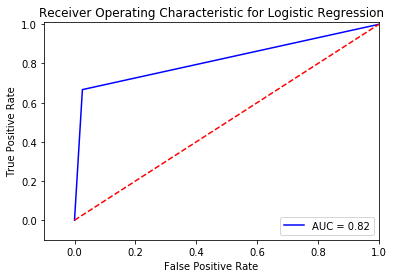

In [40]:
fpr, tpr, thresholds = roc_curve(tv_test.values.ravel(),tv_pred_test_knc)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()